In [7]:
### Imports and Auxiliary Functions

import numpy as np
import matplotlib.pyplot as plt

In [8]:
### Linear Regression - Least Squares Fitting Function

def LS1(x, y, sigma, retchi=False):
    s = np.sum(np.power(sigma, -2))
    s_x = np.sum( np.dot( x, sigma ** -2 ) )
    s_y = np.sum( np.dot( y, sigma ** -2 ) )
    s_xx = np.sum( np.power( x / sigma, 2 ) )
    s_xy = np.sum( np.dot( x * y, sigma ** -2 ) )
    a1 = ( s_y * s_xx - s_xy * s_x ) / ( s_xx * s - (s_x) ** 2 )
    a2 = ( s_x * s_y - s * s_xy ) / ( ( s_x ) ** 2 - s * s_xx )
    err_a1 = s_xx / (s * s_xx - (s_x) ** 2)
    err_a2 = s / (s * s_xx - (s_x) ** 2)
    if(retchi==True):
        chisq = np.sum( np.power( np.divide( ( a1 + a2 * x - y ), sigma ), 2 ) )
        return(a1, a2, err_a1, err_a2, chisq)
    else:
        return(a1, a2, err_a1, err_a2)

In [9]:
### Get the data and Fit a Linear Function

x, y, error = np.loadtxt('data1.txt', unpack=True)
a1, a2, err_a1, err_a2, chi_sq = LS1(x, y, error, True)

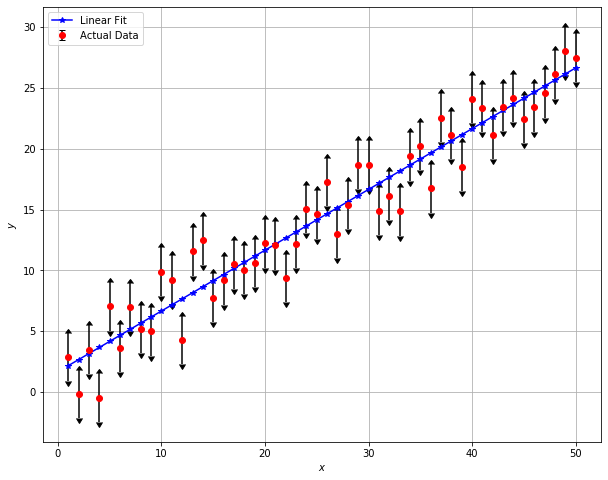

In [10]:
### Plotting

fig = plt.figure()
fig.set_size_inches(10,8)
plt.errorbar(x, y, yerr=error, fmt='ro' ,ecolor='k', lolims=True, uplims=True, label='Actual Data')
plt.plot(x, a1 + a2 * x, 'b*-', label='Linear Fit')
plt.grid(True)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

In [11]:
print('The Linear Fit is: ' + str(a1) + ' + (' + str(a2) + ') * x')
print('The errors in (a1, a2) are: (' + str(err_a1) + ', ' + str(err_a2) + ')')
print('The Chi-squared value of this fit is: ' + str(chi_sq))
print('The Reduced Chi-squared value of this fit is: ' + str(chi_sq / (np.size(x) - 2) ))

The Linear Fit is: 1.6533018775510115 + (0.49987506362545053) * x
The Chi-squared value of this fit is: 48.10604901936759
The Reduced Chi-squared value of this fit is: 1.002209354570158
